In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [2]:
ticker = 'PG' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

log_returns = np.log(1 + data.pct_change())

In [3]:
log_returns.tail()

,PG
Date,
2019-01-30,0.010422
2019-01-31,0.020421
2019-02-01,0.010313
2019-02-04,0.005729
2019-02-05,-0.006037


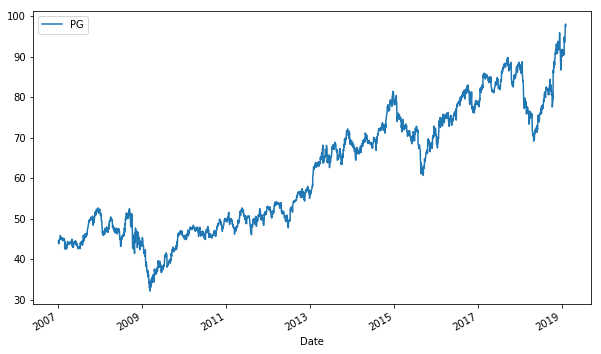

In [4]:
data.plot(figsize=(10, 6));

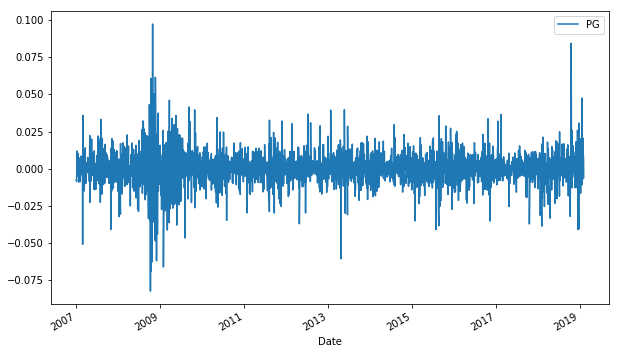

In [5]:
log_returns.plot(figsize = (10, 6))

In [6]:
u = log_returns.mean()
u

PG    0.000257
dtype: float64

In [7]:
var = log_returns.var()
var

PG    0.000121
dtype: float64

In [8]:
drift = u - (0.5 * var)
drift

PG    0.000196
dtype: float64

In [9]:
stdev = log_returns.std()
stdev

PG    0.011019
dtype: float64

******

In [10]:
type(drift)

pandas.core.series.Series

In [11]:
type(stdev)

pandas.core.series.Series

In [12]:
np.array(drift)

array([ 0.00019633])

In [13]:
drift.values

array([ 0.00019633])

In [14]:
stdev.values

array([ 0.01101926])

In [15]:
norm.ppf(0.95)

1.6448536269514722

In [16]:
x = np.random.rand(10, 2)
x

array([[ 0.67325763,  0.7251704 ],
       [ 0.08121435,  0.00301677],
       [ 0.88108204,  0.12140023],
       [ 0.50603566,  0.41820424],
       [ 0.66713576,  0.55228379],
       [ 0.13985346,  0.78108805],
       [ 0.25457205,  0.39958161],
       [ 0.31064557,  0.45498426],
       [ 0.77194794,  0.73662888],
       [ 0.84752573,  0.53905099]])

In [17]:
norm.ppf(x)

array([[ 0.44892642,  0.59827087],
       [-1.39694969, -2.74595282],
       [ 1.18041317, -1.16801564],
       [ 0.01512973, -0.20648961],
       [ 0.43201779,  0.13143347],
       [-1.08097794,  0.77587314],
       [-0.660171  , -0.25443021],
       [-0.49402129, -0.11307824],
       [ 0.74527728,  0.63298684],
       [ 1.02587915,  0.09804316]])

In [18]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.35777583, -1.69493751],
       [ 0.99563741, -0.9773987 ],
       [ 0.78029317, -0.92566753],
       [-0.16588841, -1.97915806],
       [-1.59535078, -0.20171348],
       [-0.56336432,  0.86031339],
       [ 1.34197951, -0.3790413 ],
       [ 0.8175728 ,  0.29608875],
       [-0.69520833, -0.76839612],
       [ 0.42883453, -0.31160323]])

In [19]:
t_intervals = 1000
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [20]:
daily_returns

array([[ 0.99358151,  0.99858376,  1.0176234 , ...,  0.99308196,
         0.99791121,  1.01112195],
       [ 0.99385573,  0.99681173,  1.01787185, ...,  1.00792621,
         0.98681223,  1.00852174],
       [ 1.00216708,  0.98610914,  1.00635111, ...,  0.9995096 ,
         0.99750691,  0.99980572],
       ..., 
       [ 1.02256252,  0.99063036,  0.99539081, ...,  0.99542917,
         0.99875262,  1.00478962],
       [ 1.00586167,  0.99564459,  0.99526366, ...,  0.99994715,
         1.00779499,  1.01078312],
       [ 0.99499824,  1.00499309,  1.00484568, ...,  0.98947401,
         0.99608438,  0.99927864]])

***

$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />

$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$



In [21]:
S0 = data.iloc[-1]
S0

PG    97.440002
Name: 2019-02-05 00:00:00, dtype: float64

In [22]:
price_list = np.zeros_like(daily_returns)

In [23]:
price_list

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [24]:
price_list[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [25]:
price_list[0] = S0
price_list

array([[ 97.44000244,  97.44000244,  97.44000244, ...,  97.44000244,
         97.44000244,  97.44000244],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ..., 
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [26]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [27]:
price_list

array([[  97.44000244,   97.44000244,   97.44000244, ...,   97.44000244,
          97.44000244,   97.44000244],
       [  96.84130432,   97.12933731,   99.18143544, ...,   98.2123326 ,
          96.1549862 ,   98.27036114],
       [  97.05116743,   95.78012706,   99.81134776, ...,   98.16416915,
          95.91526296,   98.25126948],
       ..., 
       [ 134.14463963,   82.74846835,  125.76916765, ...,  102.45303686,
          94.42836346,   84.3873945 ],
       [ 134.93095186,   82.38806474,  125.17348198, ...,  102.44762207,
          95.16443177,   85.29735426],
       [ 134.25606012,   82.79943617,  125.78003314, ...,  101.36925952,
          94.79180404,   85.23582442]])

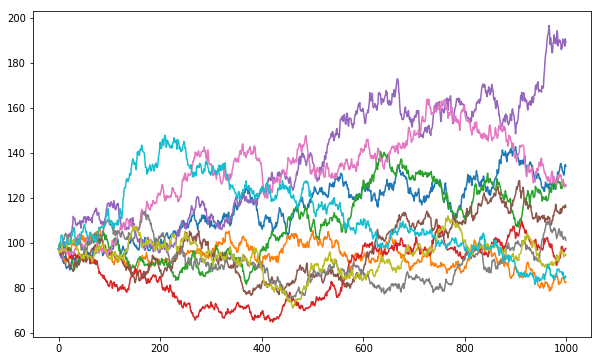

In [28]:
plt.figure(figsize=(10,6))
plt.plot(price_list);